# Projeto de Análise de Dados - Estudo do Perfil dos Clientes Banco

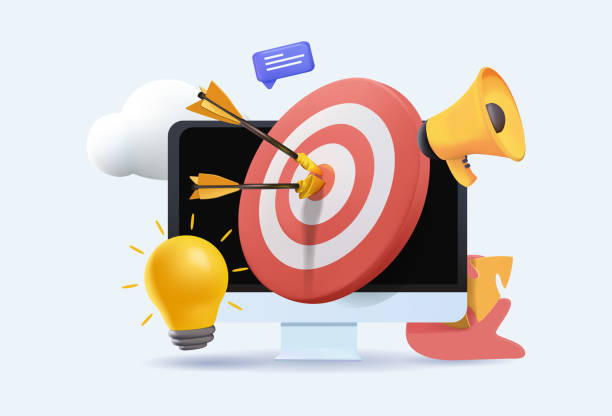

## 1. Contextualização

Com a finalidade de entender melhor o perfil dos clientes para potencializar a venda de um produto de investimento, a área de marketing criou uma campanha selecionando alguns clientes para realizar a oferta. A duração da campanha foi de 3 meses e abrangeu todo o Brasil. 

Finalizada a campanha, o marketing disponibilizou a base de dados bank_marketing.xlsx e solicitou uma análise do perfil dos clientes à área de Analytics. A expectativa é que esse estudo forneça informações suficientes para que as próximas campanhas sejam direcionadas para o público mais propenso a comprar o produto de investimento.

Sua missão, como Analista de Dados, é responder a seguinte pergunta de negócios: Qual é o perfil dos nossos clientes? Para responder de forma adequada, você deve:

1- Realizar uma Análise Exploratória buscando por insights sobre a venda dos títulos, o perfil dos clientes: Idade, Profissão, Estado Civil, Formação, Situação de Crédito e sobre a utilização de outros produtos: Hipoteca e Empréstimo.

2- Construir um relatório que embase com dados os insights encontrados, e traduza termos mais técnicos para a linguagem de negócios.

## 2. Pacotes e bibliotecas

In [34]:
import pandas as pd
import helper as h
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Carga dos dados

In [2]:
df_raw = pd.read_excel(r'data\bank_marketing.xlsx', sheet_name='bank_marketing', header=1)
df_raw = df_raw.drop(columns='Unnamed: 0')
df_raw.head()

,Cliente_Comprou_o_Titulo?,Idade,Profissão,Estado_Civil,Formação,Cliente_Devedor?,Saldo_Conta_Corrente,Tem_Hipoteca?,Tem_Emprestimo?,Qte_de_Ligações_Feitas
0,Não,33,Operário,Casado,Ensino Médio,Não,263,Sim,Não,3
1,Não,58,Aposentado,Casado,Ensino Médio,Não,19,Não,Sim,3
2,Sim,83,Aposentado,Casado,Fundamental,Não,425,Não,Não,1
3,Sim,32,Administrador,Solteiro,Ensino Superior,Não,10281,Não,Não,1
4,Sim,31,Administrador,Solteiro,Ensino Médio,Não,360,Sim,Não,1


## 4. Descrição dos dados

Feature | Descrição | Tipo
------- | --------- | ----
Cliente_Comprou_o_Titulo? | Sim / Não | Qualitativa Nominal
Idade | Quantitativa Discreta | Idade do cliente
Profissão | Profissão do cliente | Qualitativa Nominal
Estado_Civil | Estado civil do cliente | Qualitativa Ordinal
Formação | Formação acadêmica do cliente | Qualitativa Ordinal
Cliente_Devedor? | Sim / Não | Qualitativa Nominal
Saldo_Conta_Corrente | Saldo da conta corrente do cliente | Quantitativa Contínua
Tem_Hipoteca? | Sim / Não | Qualitativa Nominal
Tem_Emprestimo? | Sim / Não | Qualitativa Nominal
Qte_de_Ligações_Feitas | Número de ligações realizadas ao cliente | Quantitativa Discreta

In [3]:
df_raw.dtypes

Cliente_Comprou_o_Titulo?    object
Idade                         int64
Profissão                    object
Estado_Civil                 object
Formação                     object
Cliente_Devedor?             object
Saldo_Conta_Corrente          int64
Tem_Hipoteca?                object
Tem_Emprestimo?              object
Qte_de_Ligações_Feitas        int64
dtype: object

In [4]:
df_raw['Saldo_Conta_Corrente'] = df_raw['Saldo_Conta_Corrente'].astype('float64')

In [5]:
df_raw.shape

(9684, 10)

In [6]:
df_raw.isna().sum()

Cliente_Comprou_o_Titulo?    0
Idade                        0
Profissão                    0
Estado_Civil                 0
Formação                     0
Cliente_Devedor?             0
Saldo_Conta_Corrente         0
Tem_Hipoteca?                0
Tem_Emprestimo?              0
Qte_de_Ligações_Feitas       0
dtype: int64

In [7]:
df_raw.duplicated(keep='first').sum()

278

In [8]:
df_raw.drop_duplicates(inplace=True, keep='first')
df_raw.duplicated().sum()

0

## 5. Resumo dos dados

### 5.1 - Estatística Descritiva (Unidimensional)

In [9]:
df1 = df_raw.copy()

#### 5.1.1 - Tabela de Frequências / Gráficos

#### Variável : **Cliente_Comprou_o_Titulo?**

Tabela de Frequências

In [10]:
data = h.frequencias_cat(df1,'Cliente_Comprou_o_Titulo?')
display(data)

,Cliente_Comprou_o_Titulo?,Frequência Absoluta,Frequência Relativa %,Frequência Acumulada %
0,Não,4895,52.04,52.04
1,Sim,4511,47.96,100.00


Gráfico

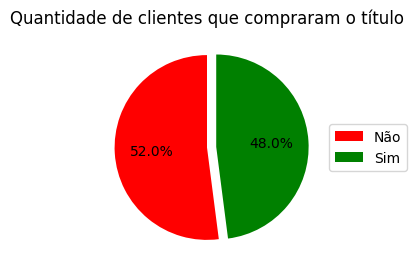

In [11]:
h.pie_plot(data,'Cliente_Comprou_o_Titulo?','Quantidade de clientes que compraram o título')

Insights

    1- Mais de 50% dos clientes NÃO compraram o título.
    2- Quase 50% dos clientes adquiriram o título.
    3- Existem algum dado histórico destas campanhas que podem definir se a porcentagem de clientes que adquiriram o título é boa ou não? Verificar com a equipe de MKT.

#### Variável : **Idade**

Tabela de Frequências

In [24]:
data = h.frequencias_num(df1,'Idade',10)
display(data)

,Faixa,Frequência Absoluta,Frequência Relativa %,Frequência Acumulada %
0,"(18, 28]",1053,11.21,11.21
1,"(28, 38]",3647,38.82,50.03
2,"(38, 48]",2246,23.91,73.94
3,"(48, 58]",1625,17.30,91.24
4,"(58, 68]",553,5.89,97.13
5,"(68, 78]",207,2.20,99.33
6,"(78, 88]",63,0.67,100.00


Gráfico

Insights

In [13]:
# Profissão

In [14]:
# Estado_Civil

In [15]:
# Formação

#### Variável : **Cliente_Devedor?**

Tabela de Frequências

In [16]:
data = h.frequencias_cat(df1,'Cliente_Devedor?')
display(data)

,Cliente_Devedor?,Frequência Absoluta,Frequência Relativa %,Frequência Acumulada %
0,Não,9341,99.31,99.31
1,Sim,65,0.69,100.00


Gráfico

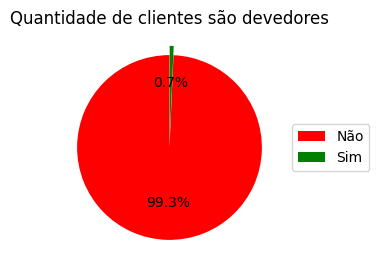

In [17]:
h.pie_plot(data,'Cliente_Devedor?','Quantidade de clientes são devedores')

Insights

    1- Quase 100% dos clientes NÃO são devedores

In [18]:
# Saldo_Conta_Corrente

#### Variável : **Tem Hipoteca?**

Tabela de Frequências

In [19]:
data = h.frequencias_cat(df1,'Tem_Hipoteca?')
display(data)

,Tem_Hipoteca?,Frequência Absoluta,Frequência Relativa %,Frequência Acumulada %
0,Não,5034,53.52,53.52
1,Sim,4372,46.48,100.00


Gráfico

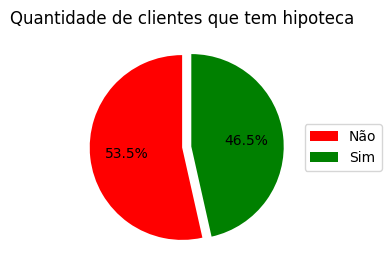

In [20]:
h.pie_plot(data,'Tem_Hipoteca?','Quantidade de clientes que tem hipoteca')

Insights

    1- Mais de 50% dos clientes não possuem hipoteca com o banco
    2- Quase 47% dos clientes possuem hipoteca com o banco

#### Variável : **Tem_Emprestimo?**

Tabela de Frequências

In [21]:
data = h.frequencias_cat(df1,'Tem_Emprestimo?')
display(data)

,Tem_Emprestimo?,Frequência Absoluta,Frequência Relativa %,Frequência Acumulada %
0,Não,8286,88.09,88.09
1,Sim,1120,11.91,100.00


Gráfico

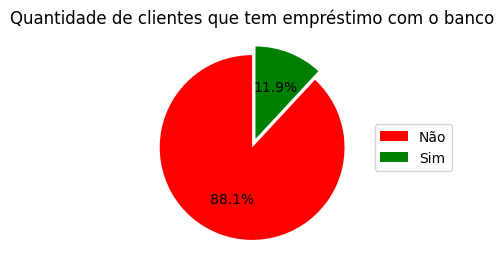

In [22]:
h.pie_plot(data,'Tem_Emprestimo?','Quantidade de clientes que tem empréstimo com o banco')

Insights

    1- Mais de 80% dos clientes NÃO possuem empréstimo com o banco
    2- Quase 12% dos clientes possuem empréstimo com o banco

In [23]:
# Qte_de_Ligações_Feitas